# Gabor feature banks for ML

Based on https://www.youtube.com/watch?v=BTbIS1mriuY&t=28s

By Python for Microscopists Youtube channel

**Objective :** The goal of this script is to get many Gabor feature responses into a pandas DataFrame for ML usage.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Original image')

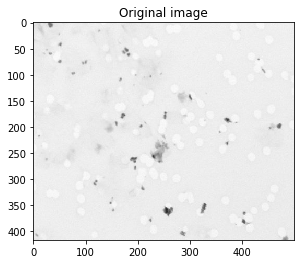

In [2]:
img = cv2.imread('images/TEM_filter_sample.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original image')

**Note:** Gabor filter is a bandpass filter

#### 1) Create the DataFrame and put the original pixels in it.

In [3]:
df = pd.DataFrame()
img_col = img.reshape(-1)
df['Original_pixels'] = img_col
df.head()

,Original_pixels
0,229
1,229
2,229
3,229
4,229


#### 2) Create the parameters for the filter

In [4]:
#parameters (allow to generate a large set of features)

ksize = 5 #depends on the feature size you want to enhance | Hardcoded here.
phi = 0 #offset | Hardcoded here

We use **nested loops** to create a range of parameters, filter the image, and add it to the DataFrame

In [5]:
# sigma = 5 # "intensity" of the filter
# theta = 1*np.pi/4 # orientation of the filter
# lambd = 1*np.pi/4 # wavelenght
# gamma = 0.5 # aspect ratio, circular = 1, elongated = 0

gabor_index = 0

for theta in range(2):
    theta = theta /4. * np.pi
    for sigma in (3,5):
        for lambd in np.arange(0, np.pi, np.pi /4.):
            for gamma in (0.05, 0.5):
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)
                filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img_col = filtered_img.reshape(-1)
                df[f'Gabor_{gabor_index}'] = filtered_img_col
                gabor_index += 1

##### 3) Show results

In [6]:
df.head()

,Original_pixels,Gabor_0,Gabor_1,Gabor_2,Gabor_3,Gabor_4,Gabor_5,Gabor_6,Gabor_7,Gabor_8,...,Gabor_22,Gabor_23,Gabor_24,Gabor_25,Gabor_26,Gabor_27,Gabor_28,Gabor_29,Gabor_30,Gabor_31
0,229,0,0,0,0,0,0,255,255,0,...,255,240,0,0,255,255,112,106,255,255
1,229,0,0,0,0,0,0,255,255,0,...,255,240,0,0,255,255,112,106,255,255
2,229,0,0,0,0,0,0,255,255,0,...,255,240,0,0,255,255,112,106,255,255
3,229,0,0,0,0,0,0,255,255,0,...,255,242,0,0,255,255,117,110,255,255
4,229,0,0,0,0,0,0,255,255,0,...,255,242,0,0,255,255,117,110,255,255


The Dataframe is now populated and ready to be used for ML

#### 4) Examples of filtered images

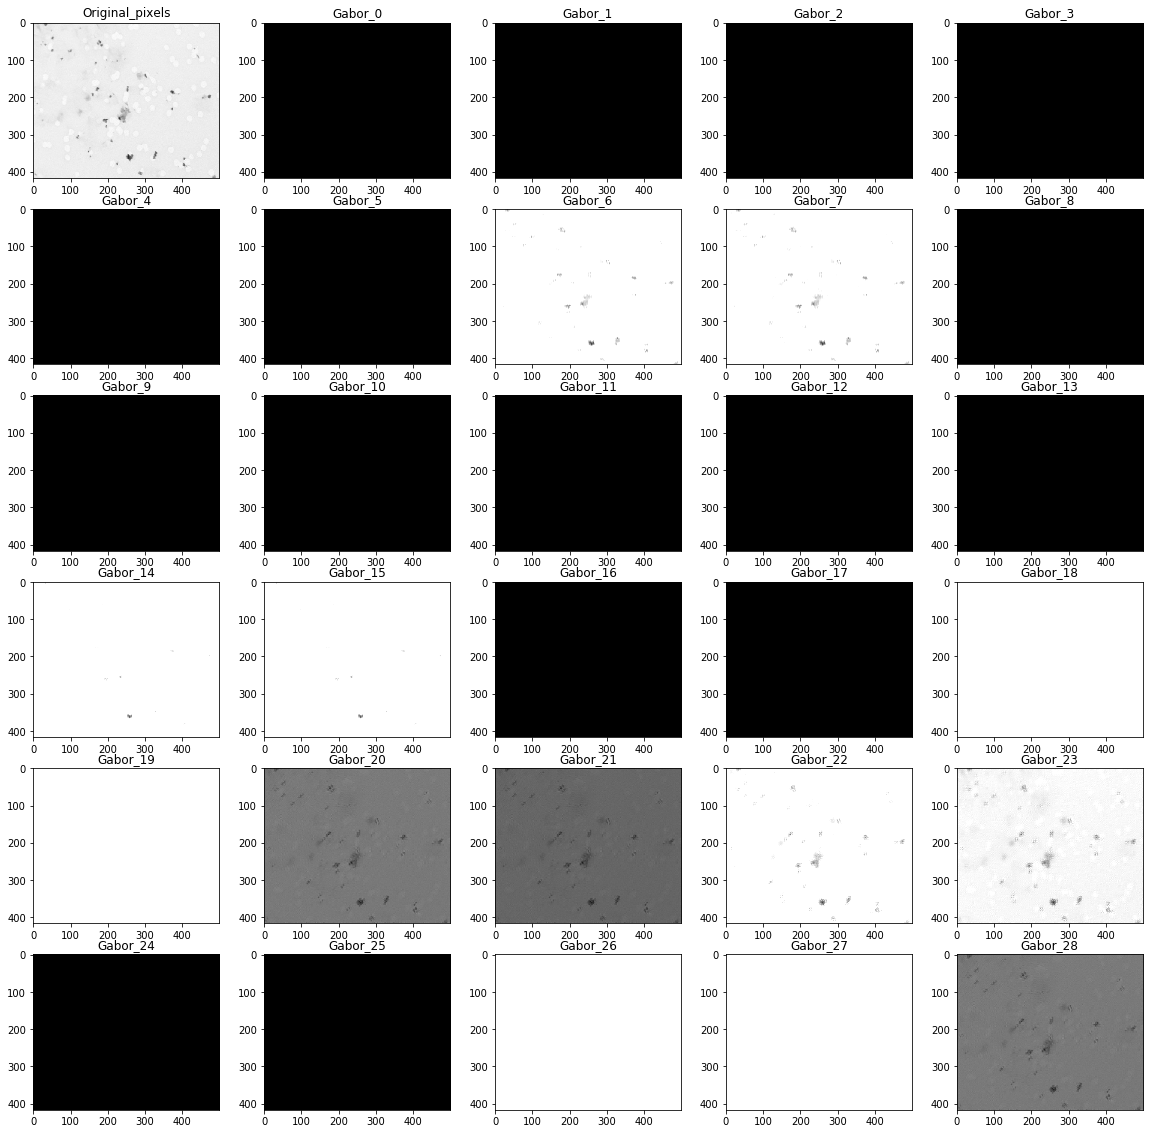

In [22]:
fig = plt.figure(figsize= (20,20))
cols = 5
rows = 6

for img_index in range(30):
    fig.add_subplot(rows, cols, img_index+1)
    plt.title(df.columns[img_index])
    plt.imshow(df[df.columns[img_index]].values.reshape(img.shape))
    